In [1]:
import pandas as pd

C:\Users\Ram\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("uber[1].csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Missing value :

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Key is related to pickup_datetime ,so it is worthless

In [9]:
df=df.drop(columns=['key'])

Rename 'Unnamed: 0' to 'ID' for uniquely identified row

In [10]:
df=df.rename(columns={"Unnamed: 0": "Id"})

In [11]:
df.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [12]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 13.7+ MB


Convert type of 'pickup_datetime' from 'object' to 'datetime' type

In [14]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Id                 199999 non-null  int64              
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 13.7 MB


In [16]:
df['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [17]:
import numpy as np


# Distance columns creation by haversine formula

In [18]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

In [19]:
df['distance_in_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [20]:
df.describe()

,Id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


# Exploratory data analysis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'fare amount'}, xlabel='fare_amount'>

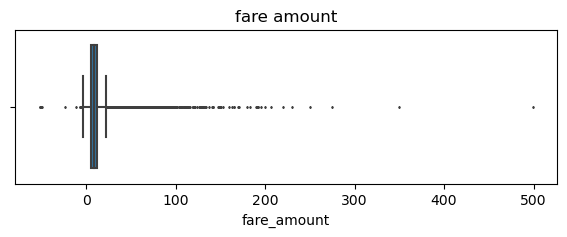

In [22]:
plt.figure(figsize=(7,2))
plt.title('fare amount')
sns.boxplot(data=df, x='fare_amount',fliersize=1)

C:\Users\Ram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


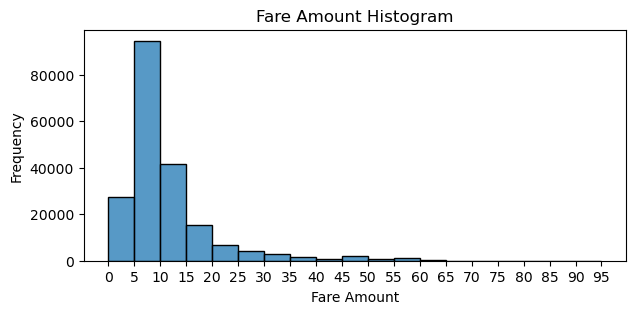

In [23]:
plt.figure(figsize=(7,3))
ax = sns.histplot(data=df['fare_amount'], bins=range(0,100,5))
ax.set_xticks(range(0,100,5))
ax.set_xticklabels(range(0,100,5))
plt.title('Fare Amount Histogram')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

The fare amount is skewed to the right,and the visualization shows that majority of the trips has fare amount of 0-20 dollars.

Trip Distance 

<Axes: title={'center': 'Trip_distance_in_km'}, xlabel='distance_in_km'>

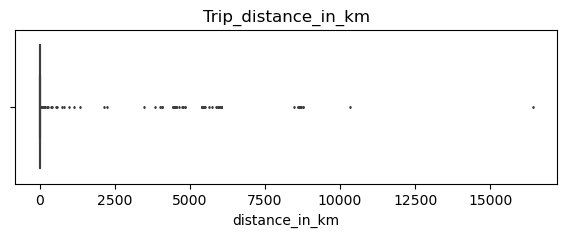

In [24]:
plt.figure(figsize=(7,2))
plt.title('Trip_distance_in_km')
sns.boxplot(data=df, x='distance_in_km',fliersize=1)

C:\Users\Ram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


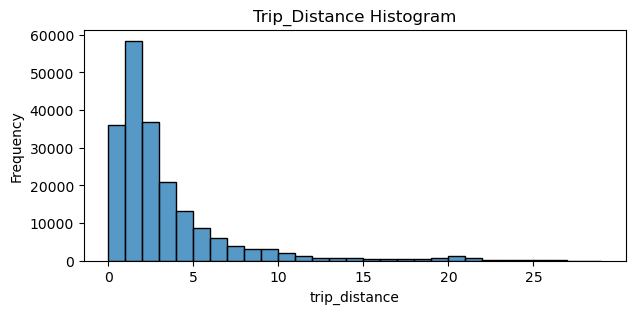

In [25]:
plt.figure(figsize=(7,3))
ax = sns.histplot(data=df['distance_in_km'], bins=range(0,30,1))
ax.set_xticks(range(0,30,5))
ax.set_xticklabels(range(0,30,5))
plt.title('Trip_Distance Histogram')
plt.xlabel('trip_distance')
plt.ylabel('Frequency')
plt.show()

This visualization shows that majority of the trips distance between 0 and 5 means less than 5 km.

<Axes: title={'center': 'Passenger Count'}, xlabel='passenger_count'>

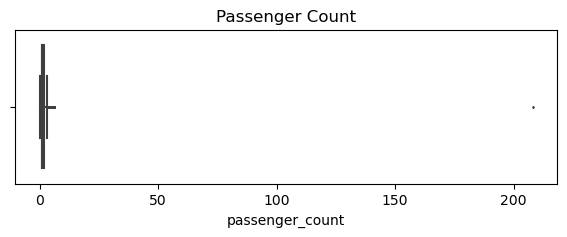

In [26]:
plt.figure(figsize=(7,2))
plt.title('Passenger Count')
sns.boxplot(data=df, x='passenger_count',fliersize=1)

C:\Users\Ram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


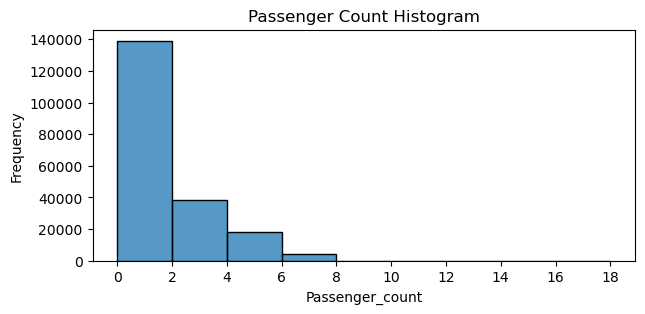

In [27]:
plt.figure(figsize=(7,3))
ax = sns.histplot(data=df['passenger_count'], bins=range(0,20,2))
ax.set_xticks(range(0,20,2))
ax.set_xticklabels(range(0,20,2))
plt.title('Passenger Count Histogram')
plt.xlabel('Passenger_count')
plt.ylabel('Frequency')
plt.show()

2 passenger per trip is major and passenger count up to 8.

In [28]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

Create Month and Date Column

In [29]:
df['pickup_datetime'].head(5)

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [30]:
df['day']=df['pickup_datetime'].dt.day_name()

In [31]:
df['month']=df['pickup_datetime'].dt.month_name()

In [32]:
df.head(5)

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,day,month
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,Thursday,May
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,Friday,July
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,Monday,August
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,Friday,June
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,Thursday,August


In [33]:
df.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_in_km', 'day', 'month'],
      dtype='object')

# -----------------------------------------------------------------------------------

# Extract trip distance on the basis of month

In [34]:
monthly_distance=df.groupby('month')['distance_in_km'].sum().round(2)

In [35]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_distance= monthly_distance.reindex(index=month_order)
monthly_distance

month
January      345903.30
February     432012.06
March        353869.09
April        386578.19
May          317423.67
June         446477.10
July         279650.06
August       344828.67
September    301016.82
October      347386.94
November     338863.50
December     277039.71
Name: distance_in_km, dtype: float64

Text(0.5, 1.0, 'Ride Distance by Month')

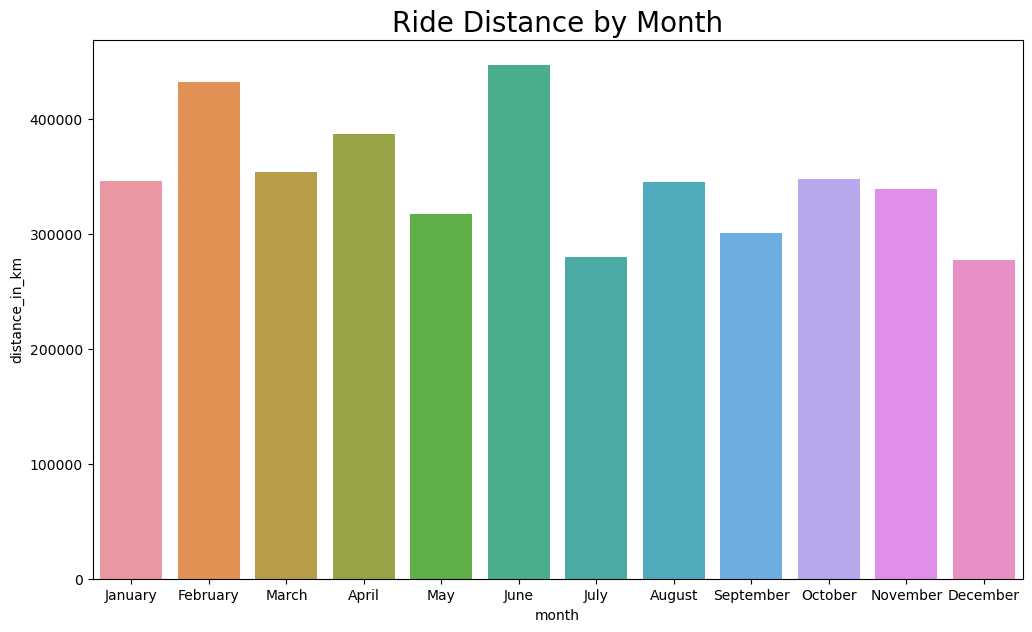

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(x=monthly_distance.index,y=monthly_distance)
plt.title("Ride Distance by Month",fontsize=20)

Maximum distance cover in june month in Overall dataset

# Extract Passenger count  by month

In [37]:
monthly_count=df['month'].value_counts()

In [38]:
monthly_count

month
May          18859
March        18763
April        18606
June         17787
January      17668
February     16695
October      16212
December     15516
November     15312
September    15266
July         15094
August       14221
Name: count, dtype: int64

In [39]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_count=monthly_count.reindex(index=month_order)

In [40]:
month_cnt=monthly_count.index.tolist()

In [41]:
month_cnt_val=monthly_count.values

C:\Users\Ram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Passenger count by month')

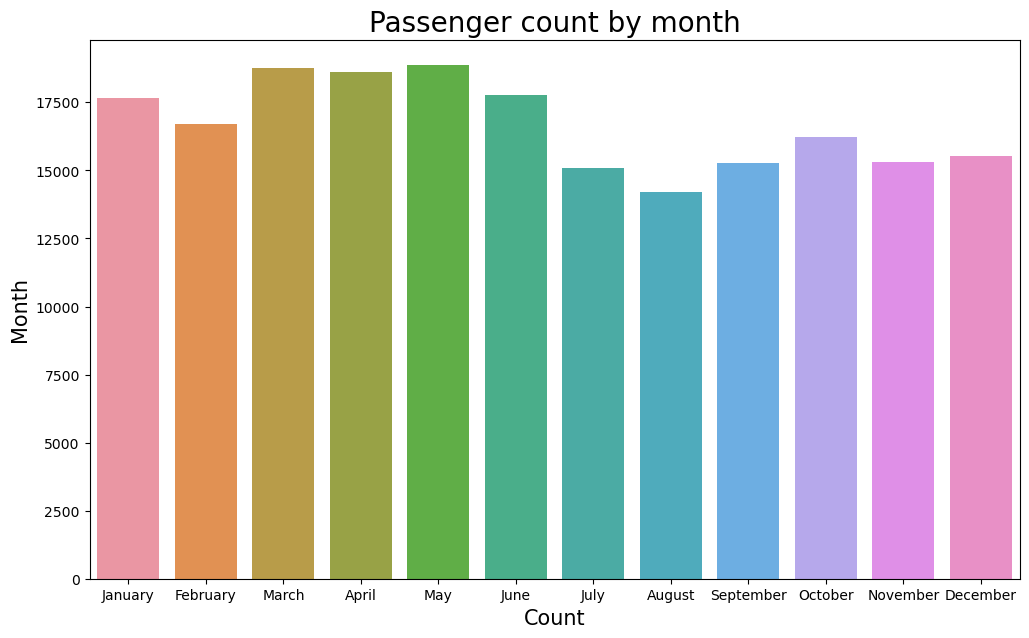

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Month",fontsize=15)
sns.barplot(x=month_cnt,y=month_cnt_val)
plt.title("Passenger count by month",fontsize=20)

Maximum passenger travel in May month in overall dataset

# Fare_amount by month

In [43]:
monthly_fare=df.groupby('month')['fare_amount'].sum()

In [44]:
monthly_fare

month
April        210972.89
August       159351.40
December     178390.28
February     182453.99
January      189499.77
July         168454.49
June         206421.84
March        208300.37
May          220246.02
November     177806.02
October      190058.67
September    180011.21
Name: fare_amount, dtype: float64

In [45]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_fare=monthly_fare.reindex(index=month_order)

Text(0.5, 1.0, 'Monthly_Fare_Amount')

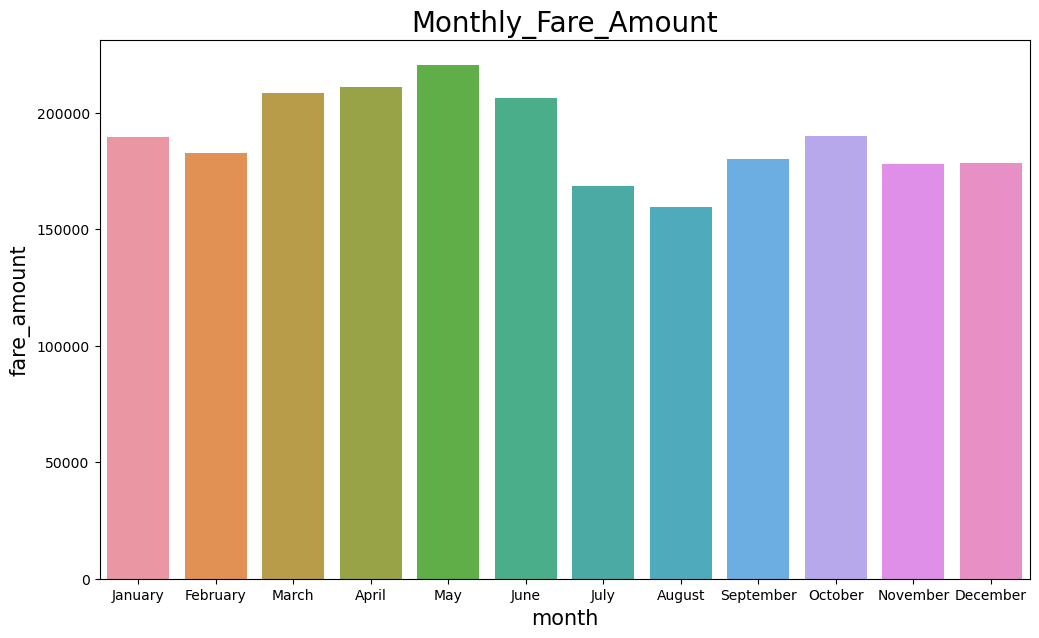

In [46]:
plt.figure(figsize=(12,7))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Fare_Amount",fontsize=15)
sns.barplot(x=monthly_fare.index,y=monthly_fare)
plt.title("Monthly_Fare_Amount",fontsize=20)

The analysis revealed that May was the most lucrative month, generating the highest fare_amount compared to other months.

# ------------------------------------------------------------------------------------

In [47]:
df.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_in_km', 'day', 'month'],
      dtype='object')

# Extract trip distance on the basis of day

In [48]:
day_distance=df.groupby('day')['distance_in_km'].sum().round(2)
day_distance

day
Friday       625120.98
Monday       605392.66
Saturday     599333.81
Sunday       484053.37
Thursday     583874.89
Tuesday      661519.05
Wednesday    611754.35
Name: distance_in_km, dtype: float64

In [49]:
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_distance= day_distance.reindex(index=day_order)
day_distance

day
Sunday       484053.37
Monday       605392.66
Tuesday      661519.05
Wednesday    611754.35
Thursday     583874.89
Friday       625120.98
Saturday     599333.81
Name: distance_in_km, dtype: float64

Text(0.5, 1.0, 'Ride Distance by Day')

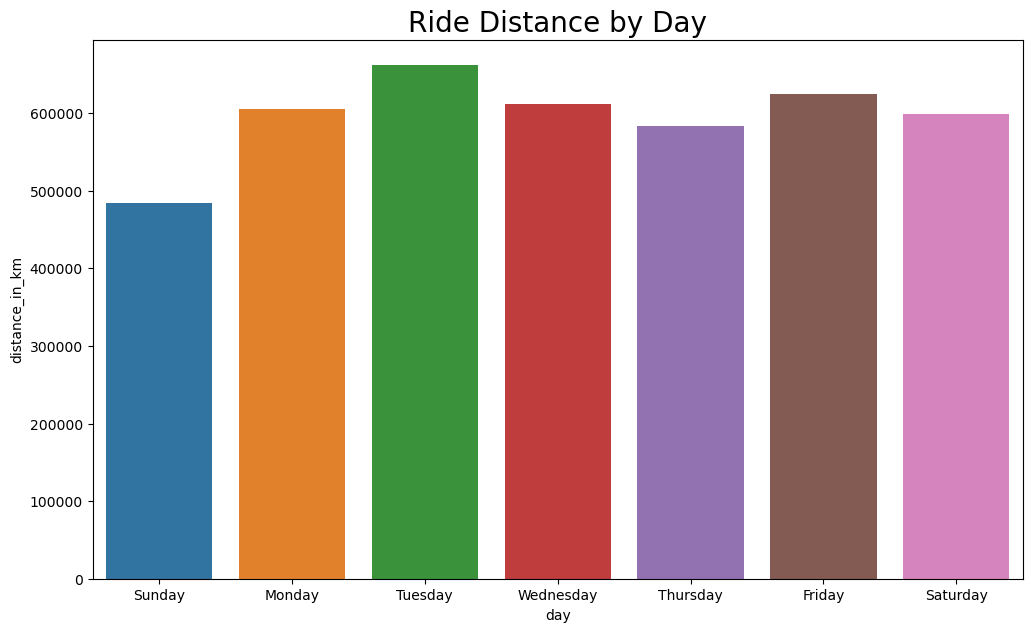

In [50]:
plt.figure(figsize=(12,7))
sns.barplot(x=day_distance.index,y=day_distance)
plt.title("Ride Distance by Day",fontsize=20)

Maximum distance cover on tuesday

In [51]:
day_count=df.groupby('day')['passenger_count'].sum()
day_count

day
Friday       51674
Monday       41440
Saturday     53784
Sunday       46582
Thursday     49461
Tuesday      46472
Wednesday    47494
Name: passenger_count, dtype: int64

In [52]:
day_count=day_count.reindex(index=day_order)
day_count

day
Sunday       46582
Monday       41440
Tuesday      46472
Wednesday    47494
Thursday     49461
Friday       51674
Saturday     53784
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Count_passenger_by_day')

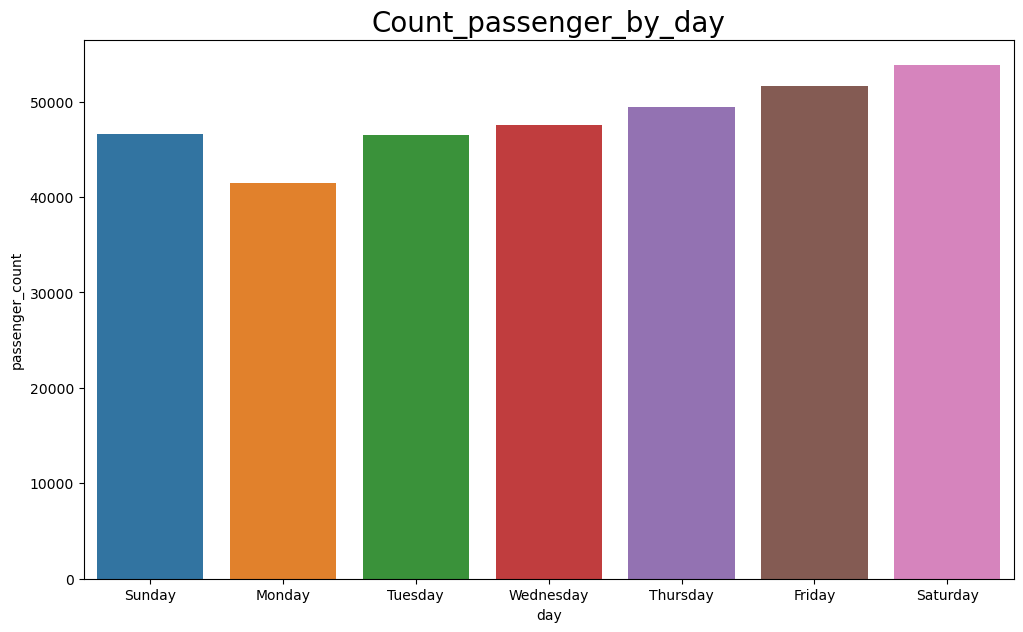

In [53]:
plt.figure(figsize=(12,7))
sns.barplot(x=day_count.index,y=day_count)
plt.title("Count_passenger_by_day",fontsize=20)

Maximum no of Passengers travel on Saturday

In [54]:
fare_amount_day=df.groupby('day')['fare_amount'].sum()
fare_amount_day

day
Friday       353260.80
Monday       287228.19
Saturday     333737.30
Sunday       310852.63
Thursday     345774.92
Tuesday      311504.73
Wednesday    329608.38
Name: fare_amount, dtype: float64

In [55]:
fare_amount_day=fare_amount_day.reindex(index=day_order)

Text(0.5, 1.0, 'fare_amount_by_day')

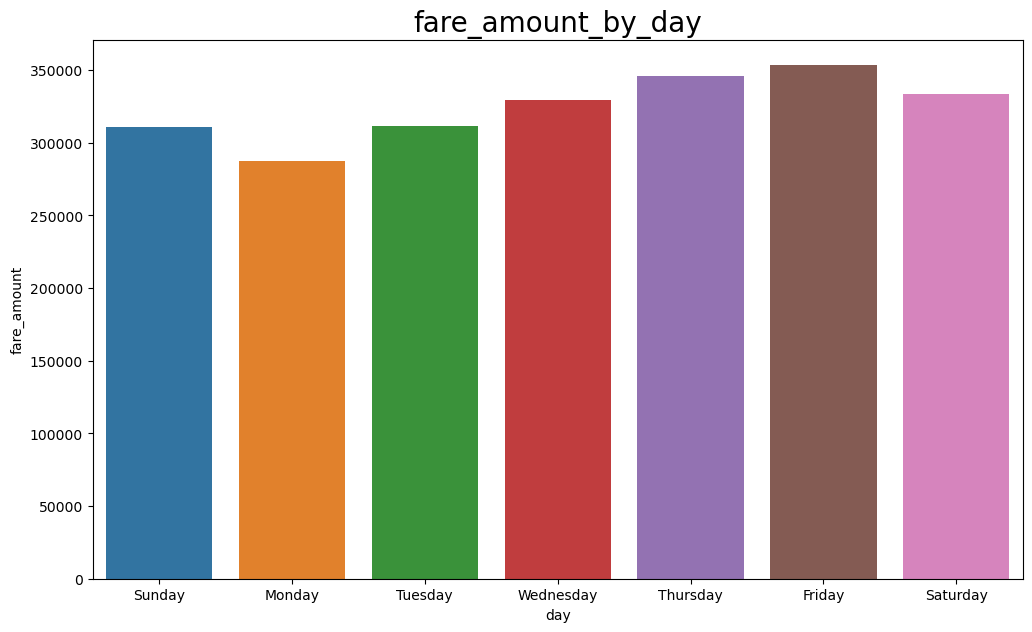

In [56]:
plt.figure(figsize=(12,7))
sns.barplot(x=fare_amount_day.index,y=fare_amount_day)
plt.title("fare_amount_by_day",fontsize=20)

Maximum Fare Amount generated on Friday

# CONCLUSION :

1. June: The month of June recorded the maximum trip distances, indicating that trips during this month were generally longer compared to other months.
May:

2. May: had the highest number of passengers, making it the month with the most travel activity.
It also generated the highest fare amounts, suggesting that May was the most profitable month, likely due to a combination of high passenger counts and longer trips.
3. Tuesday: On Tuesdays, the maximum trip distances were observed, suggesting that trips on this day were typically longer.
4. Saturday: Saturday saw the highest number of passengers, indicating that it was the busiest day of the week in terms of passenger travel.
5. Friday: The highest fare amounts were generated on Fridays, making it the most lucrative day of the week.